In [2]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [3]:
import mdtraj as md
import seaborn as sns

## Make HMM from MSM

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [5]:
M = pickle.load(open('Data/Chodera_data/Processed/MSM_lag1.0.pickle', 'rb'))
HMM = pickle.load(open('Data/Chodera_data/Processed/HMM_lag1.0.pickle', 'rb'))

In [6]:
stat_dist = HMM.stationary_distribution_obs

In [7]:
membership = HMM.metastable_assignments
print(membership.shape)
n_sets = HMM.nstates

(500,)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
free_energy = -np.log(stat_dist)
free_energy = scaler.fit_transform(free_energy[:,np.newaxis])

In [13]:
stat_dist_by_state = [stat_dist[np.where(membership==i)[0]] for i in range(n_sets)]
free_energy_by_state = [free_energy[np.where(membership==i)[0]] for i in range(n_sets)]
min_Fs = [np.min(x) for x in free_energy_by_state]
max_Fs = [np.max(x) for x in free_energy_by_state]

In [14]:
state_cols = sns.color_palette('colorblind', HMM.nstates)
state_cols[3]

(0.8, 0.4745098039215686, 0.6549019607843137)

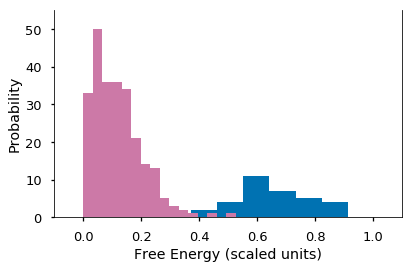

In [25]:
with sns.plotting_context('talk', font_scale=1):

    states = [0, 3]
    for state in states:
        sns.distplot(free_energy_by_state[state], kde=False, norm_hist=False, label='State {}'.format(state+1), 
                    color=state_cols[state], hist_kws={'alpha': 1})
#         plt.vlines(min_Fs[state], 0, 55, color=state_cols[state])
#         plt.vlines(max_Fs[state], 0, 55, color=state_cols[state])
        
    plt.xlabel('Free Energy (scaled units)')
    plt.ylabel('Probability')
    plt.xlim((-0.1,1.1))
    plt.ylim((0,55))
    
    sns.despine(top=True,right=False)

    plt.tight_layout()
    plt.savefig('figures/free_energy_distribution_no_limits_{0}.pdf'.format('+'.join([str(x+1) for x in states])))

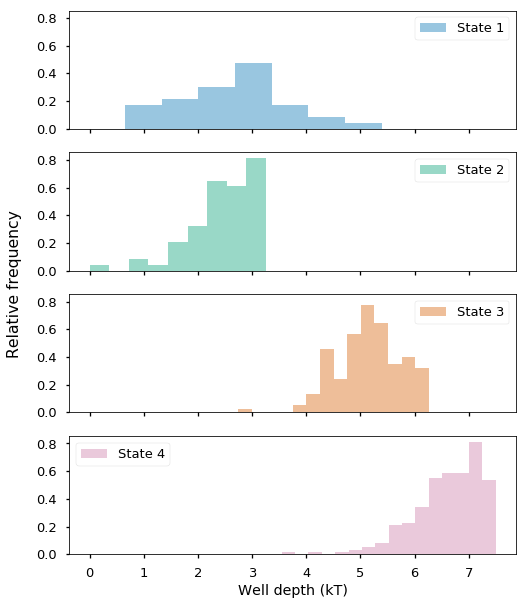

In [59]:
with sns.plotting_context('talk', font_scale=1):
    cols = sns.color_palette('colorblind', 4)
    fig, axes = plt.subplots(n_sets, sharex=True, sharey=True, figsize=(8,10))
    tol = 1e-7
    for i, ax in enumerate(axes):
    #     ax.hist(free_energy_by_state[i], bins=10)
        sns.distplot(free_energy_by_state[i], ax=ax, kde=False, 
                     norm_hist=True, label='State {}'.format(i+1), color=cols[i])
        ax.legend()
    ax.set_xlabel('Well depth (kT)')
    fig.text(0.03, 0.5, 'Relative frequency', ha='center', va='center', rotation='vertical')
#     plt.tight_layout()
    plt.savefig('figures/free_energy_distributions.png', transparent=True)

In [37]:
properties

{'kurtosis': [0.36622107154810113,
  2.6875545353416754,
  0.7540433289221093,
  2.451736386244396],
 'max': [5.389165093913082,
  3.2564803865152321,
  6.267141438773189,
  7.4949406579953024],
 'mean': [2.641521732662846,
  2.4701679832704619,
  5.1600571433475722,
  6.6137305877192425],
 'skew': [0.19540249659779124,
  -1.3696788462249843,
  -0.4574843290473749,
  -1.2553101419550925],
 'std': [1.0197931882292639,
  0.61910010010127448,
  0.59092368507252779,
  0.61845472430611448]}

In [39]:
scaled_properties = {}
for k, v in properties.items():
    scaled_properties[k] = [x[0] for x in scaler.fit_transform(np.array(v).reshape(-1,1))]

In [40]:
scaled_properties

{'kurtosis': [0.0, 1.0, 0.16706874019737797, 0.89841263533421833],
 'max': [0.50317440079557862, 0.0, 0.71031951685762384, 0.99999999999999989],
 'mean': [0.041354207900324291, 0.0, 0.64917304668911768, 1.0000000000000002],
 'skew': [1.0000000000000002, 0.0, 0.58284160204247182, 0.073075246085048118],
 'std': [0.99999999999999978, 0.065699274071369995, 0.0, 0.064194443836509185]}

In [41]:
pickle.dump( scaled_properties, open('Data/Chodera_data/Processed/static_properties_01_scale.pickle', 'wb'))

In [42]:
scaled_properties = {}
for k, v in properties.items():
    signs = np.sign(v)
    v = np.abs(v)
    scaled_v = np.array(v)/np.max(v)
    scaled_v = scaled_v*signs
    scaled_properties[k] = list(scaled_v)

In [43]:
pickle.dump(scaled_properties, open('Data/Chodera_data/Processed/static_properties_max_scale.pickle', 'wb'))

In [44]:
scaled_properties

{'kurtosis': [0.13626554056196763,
  1.0,
  0.28056856856534296,
  0.91225549249466698],
 'max': [0.71904039535845243, 0.43449048299553239, 0.83618292989253407, 1.0],
 'mean': [0.39939965767093333, 0.37349086880817506, 0.78020371028252422, 1.0],
 'skew': [0.142663002452251, -1.0, -0.33400846505606924, -0.91649961990352191],
 'std': [1.0, 0.60708397275751569, 0.57945443438251309, 0.60645112307523785]}